In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('torino.csv')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  150 non-null    object
 1   Age     150 non-null    int64 
 2   Season  150 non-null    object
 3   Team    150 non-null    object
 4   Value   150 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 6.0+ KB


In [124]:
df = df[df.Age<=21].sort_values(by="Value",ascending=False)
df['Value'] = df['Value'] / 1000000
df = pd.DataFrame(df.groupby(['Player','Age','Team'])['Value'].sum()).reset_index()
df = df.sort_values(by=['Age','Value'],ascending=False)
df.reset_index(inplace=True)
df = df.iloc[:,1:]

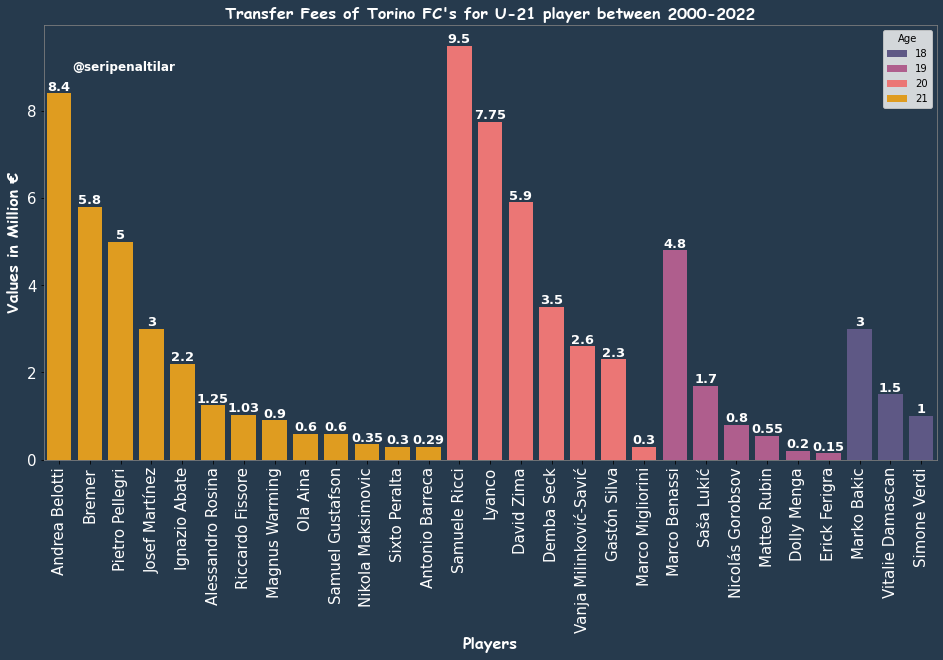

In [162]:
fig,ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')
ax = sns.barplot(x='Player',y='Value',hue='Age',data=df,ci=None,dodge=False,palette=['#58508d','#bc5090','#ff6361','#ffa600'])
ax.spines[['left','bottom','right','top']].set_color('grey')
font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

for x in range(0,4):
    ax.bar_label(ax.containers[x],c='white',size=13,weight='bold')
    
ax.set_xlabel('Players', fontdict=font)
ax.set_ylabel('Values in Million €', fontdict=font)
plt.title("Transfer Fees of Torino FC's for U-21 player between 2000-2022",fontdict=font)
plt.xticks(rotation=90,fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')
plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')
plt.show()